In [1]:
import numpy as np

In [2]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 200

In [3]:
import scipy
from scipy.io import loadmat
from data_generator import DataGenerator

In [4]:
from likelihood import GaussianLogLikelihood
from prior import ComplexityLogPrior
from posterior import LogPosterior
from mcmc import MCMC
from sequential_mc import SequentialMC
from util import generate_binary_coef_random
import pandas as pd
import torch

In [5]:
import matplotlib.pyplot as plt

In [6]:
from nn_smoothing_1D import NNSmoothing

In init py ['/talos/u/wangnisn/devel/Machine_learning_dynamics/Bayesian', '', '/mpcdf/soft/SLE_15/packages/x86_64/keras/anaconda_3_2019.03-2019.03/2.3.1/lib/python3.7/site-packages', '/mpcdf/soft/SLE_15/packages/skylake/tensorflow/gpu/anaconda_3_2019.03-2019.03-cuda_10.0-10.0.130/1.14.0/lib/python3.7/site-packages', '/mpcdf/soft/SLE_15/packages/skylake/pytorch/gpu/anaconda_3_2019.03-2019.03-cuda_10.0-10.0.130/1.2.0/lib/python3.7/site-packages', '/u/wangnisn/kaggle/defect_in_steel/version3/code/dummy_11a', '/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2019.03/lib/python37.zip', '/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2019.03/lib/python3.7', '/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2019.03/lib/python3.7/lib-dynload', '/u/wangnisn/.local/lib/python3.7/site-packages', '/u/wangnisn/.local/lib/python3.7/site-packages/pystem-0.0.13-py3.7-linux-x86_64.egg', '/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2019.03/lib/python3.7/site-packages', '/mpcdf/soft/SLE_15/packages/x86_64/ana

W0528 09:43:22.819103 47145081609600 __init__.py:308] Limited tf.compat.v2.summary API due to missing TensorBoard installation.
W0528 09:43:22.870014 47145081609600 deprecation_wrapper.py:119] From /talos/u/wangnisn/devel/Machine_learning_dynamics/Bayesian/nn_smoothing_1D.py:13: The name tf.set_random_seed is deprecated. Please use tf.compat.v1.set_random_seed instead.



In [7]:
data = loadmat('../data/phase_field_oneD_last641_filtered.mat')

In [8]:
data['usol'].shape

(500, 641)

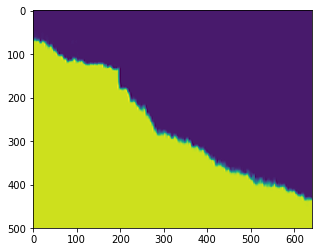

In [9]:
plt.imshow(data['usol'])

In [10]:
data['usol'].shape

(500, 641)

In [11]:
# calculate derivatives and prepare data
u = data['usol']
t = np.squeeze(data['t'])
x = np.squeeze(data['x'])

In [12]:
u.shape

(500, 641)

In [13]:
x_mesh, t_mesh = np.meshgrid(x,t,indexing='ij')

In [14]:
x_train = np.expand_dims( x_mesh.flatten(),axis=1)

In [15]:
t_train = np.expand_dims(t_mesh.flatten(),axis=1)

In [16]:
y_train = np.expand_dims(u.flatten(),axis=1)

In [19]:
layers = [2, 20, 20, 20, 20, 20, 20, 20, 20, 1]

In [20]:
nnsmooth = NNSmoothing(x=x_train, t=t_train,u=y_train,layers=layers,alpha=1.0)

W0528 09:47:23.465712 47145081609600 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

W0528 09:47:26.982194 47145081609600 deprecation_wrapper.py:119] From /talos/u/wangnisn/devel/Machine_learning_dynamics/Bayesian/nn_smoothing_1D.py:63: The name tf.train.AdamOptimizer is deprecated. Please use tf.compat.v1.train.AdamOptimizer instead.



In [ ]:
nnsmooth.train(5000)

It: 0, Loss: 1.489e+05, Time: 3.90
It: 10, Loss: 5.286e+04, Time: 1.94
It: 20, Loss: 3.201e+04, Time: 1.94
It: 30, Loss: 2.418e+04, Time: 1.94
It: 40, Loss: 2.465e+04, Time: 1.95
It: 50, Loss: 2.319e+04, Time: 1.95
It: 60, Loss: 2.276e+04, Time: 1.96
It: 70, Loss: 2.228e+04, Time: 1.95
It: 80, Loss: 2.161e+04, Time: 1.94
It: 90, Loss: 2.071e+04, Time: 1.95
It: 100, Loss: 1.930e+04, Time: 1.94
It: 110, Loss: 1.702e+04, Time: 1.94
It: 120, Loss: 1.377e+04, Time: 1.96
It: 130, Loss: 1.053e+04, Time: 1.94
It: 140, Loss: 9.002e+03, Time: 1.94
It: 150, Loss: 8.539e+03, Time: 1.96
It: 160, Loss: 8.136e+03, Time: 1.94
It: 170, Loss: 7.731e+03, Time: 1.96
It: 180, Loss: 7.401e+03, Time: 1.95
It: 190, Loss: 7.087e+03, Time: 1.94
It: 200, Loss: 6.807e+03, Time: 1.95
It: 210, Loss: 6.575e+03, Time: 1.94
It: 220, Loss: 6.394e+03, Time: 1.94
It: 230, Loss: 6.259e+03, Time: 1.92
It: 240, Loss: 6.161e+03, Time: 1.94
It: 250, Loss: 6.088e+03, Time: 1.93
It: 260, Loss: 6.029e+03, Time: 1.93
It: 270, Los

It: 2190, Loss: 1.626e+03, Time: 1.93
It: 2200, Loss: 1.625e+03, Time: 1.93
It: 2210, Loss: 1.714e+03, Time: 1.93
It: 2220, Loss: 1.628e+03, Time: 1.93
It: 2230, Loss: 1.623e+03, Time: 1.93
It: 2240, Loss: 1.623e+03, Time: 1.93
It: 2250, Loss: 1.622e+03, Time: 1.93
It: 2260, Loss: 1.621e+03, Time: 1.93
It: 2270, Loss: 1.619e+03, Time: 1.93
It: 2280, Loss: 1.618e+03, Time: 1.94
It: 2290, Loss: 1.617e+03, Time: 1.93
It: 2300, Loss: 1.617e+03, Time: 1.93
It: 2310, Loss: 1.616e+03, Time: 1.93
It: 2320, Loss: 1.615e+03, Time: 1.93
It: 2330, Loss: 1.614e+03, Time: 1.93
It: 2340, Loss: 1.613e+03, Time: 1.92
It: 2350, Loss: 1.612e+03, Time: 1.93
It: 2360, Loss: 1.611e+03, Time: 1.93
It: 2370, Loss: 1.610e+03, Time: 1.93
It: 2380, Loss: 1.609e+03, Time: 1.93
It: 2390, Loss: 1.608e+03, Time: 1.94
It: 2400, Loss: 1.607e+03, Time: 1.94
It: 2410, Loss: 1.606e+03, Time: 1.92
It: 2420, Loss: 1.605e+03, Time: 1.93
It: 2430, Loss: 1.604e+03, Time: 1.94
It: 2440, Loss: 1.603e+03, Time: 1.92
It: 2450, Lo

It: 4350, Loss: 7.300e+02, Time: 1.93
It: 4360, Loss: 6.826e+02, Time: 1.94
It: 4370, Loss: 6.815e+02, Time: 1.94
It: 4380, Loss: 6.815e+02, Time: 1.94
It: 4390, Loss: 6.782e+02, Time: 1.93
It: 4400, Loss: 6.762e+02, Time: 2.31
It: 4410, Loss: 6.750e+02, Time: 1.91
It: 4420, Loss: 6.740e+02, Time: 1.93
It: 4430, Loss: 6.730e+02, Time: 1.93
It: 4440, Loss: 6.721e+02, Time: 1.93
It: 4450, Loss: 6.712e+02, Time: 1.93
It: 4460, Loss: 6.703e+02, Time: 1.93
It: 4470, Loss: 6.694e+02, Time: 1.92
It: 4480, Loss: 6.685e+02, Time: 1.93
It: 4490, Loss: 6.676e+02, Time: 1.93
It: 4500, Loss: 6.674e+02, Time: 1.92
It: 4510, Loss: 8.266e+02, Time: 1.93
It: 4520, Loss: 6.930e+02, Time: 1.93
It: 4530, Loss: 6.808e+02, Time: 1.93
It: 4540, Loss: 6.646e+02, Time: 1.92
It: 4550, Loss: 6.645e+02, Time: 1.93
It: 4560, Loss: 6.634e+02, Time: 1.93
It: 4570, Loss: 6.621e+02, Time: 1.93
It: 4580, Loss: 6.611e+02, Time: 1.92
It: 4590, Loss: 6.603e+02, Time: 1.93
It: 4600, Loss: 6.595e+02, Time: 1.93
It: 4610, Lo